# PROJECT TITLE:PREDICT HEART ATTACK 

# PROJECT DESCRIPTION:


# 1.EDA


# 2.PCA AND LOGISTIC REGRESSION

# 3.ENSEMBLING

# 4.DATA VISUALIZATION

# Import Necessary Library:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading The File:

In [2]:
df=pd.read_csv (r"heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# EDA

# EDA PART 1: Handling Missing Values

In [7]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# THERE IS NO MISSING VALUES IN MY DATASET

# EDA PART II:Removal of duplicated records

In [9]:
df.duplicated(subset = None, keep = 'first')

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

# EDA PART III:Outlier Treatment

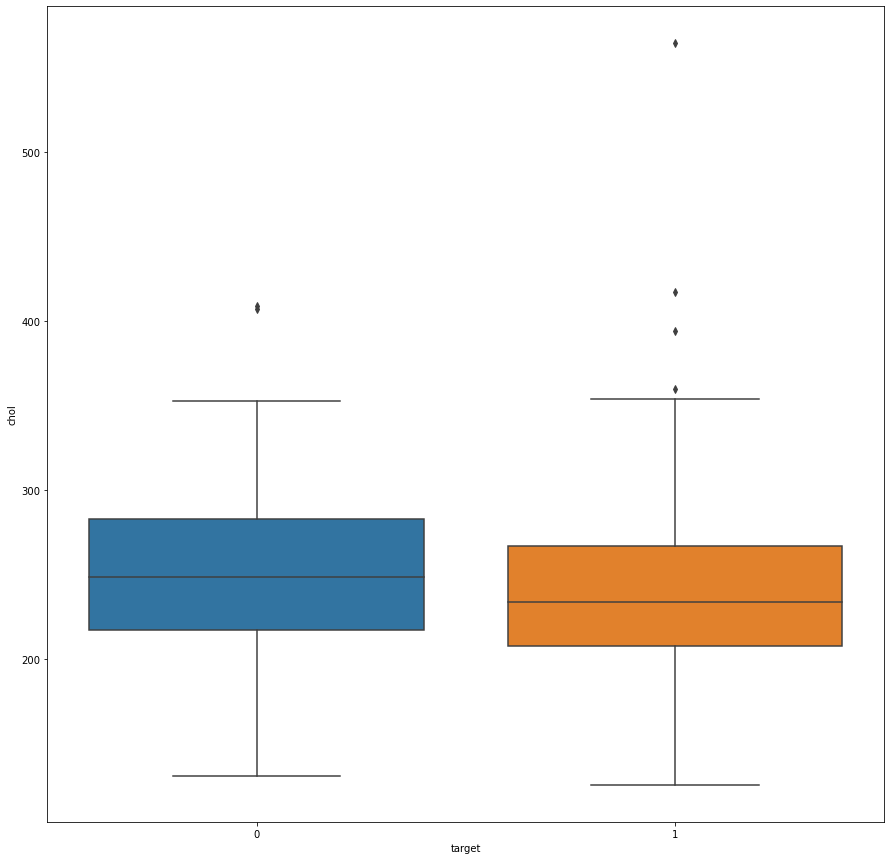

In [10]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x="target",y="chol")
plt.show()

In [11]:
df[(df["target"]==0) & (df["chol"] >=400)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [12]:
df[(df["target"]==1) & (df["chol"] >=350)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1


# REMOVING OUTLIER

In [13]:
df.drop(220,inplace=True)

In [14]:
df.drop(246,inplace=True)

In [15]:
df.drop(4,inplace=True)

In [16]:
df.drop(28,inplace=True)

In [17]:
df.drop(39,inplace=True)

In [18]:
df.drop(85,inplace=True)

In [19]:
df.drop(96,inplace=True)

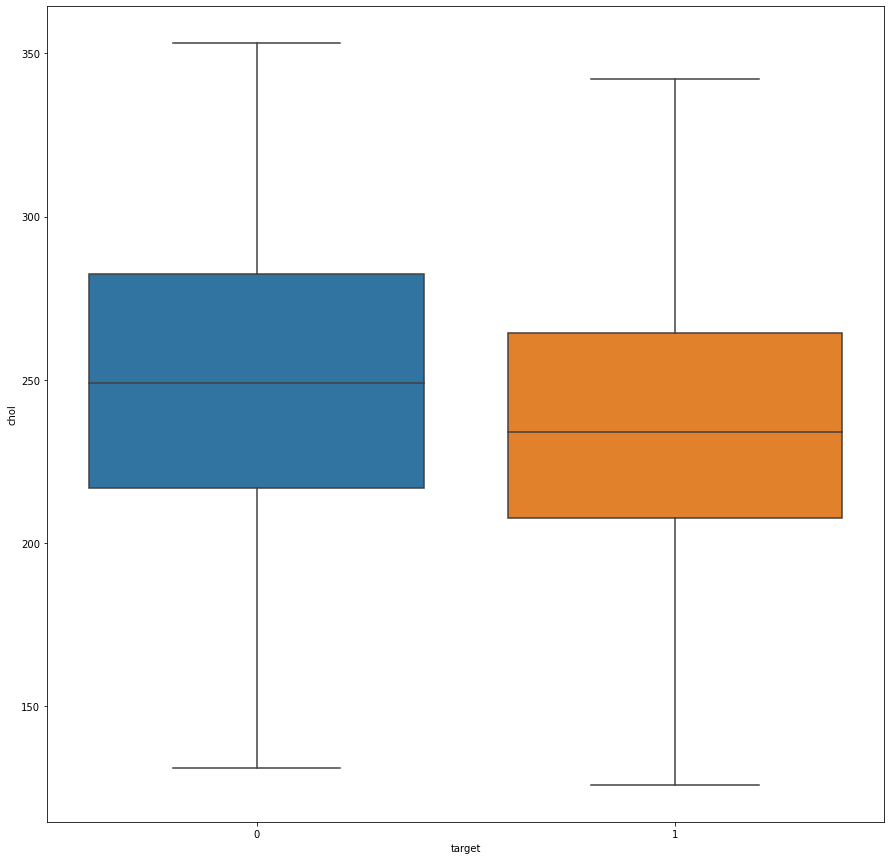

In [20]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x="target",y="chol")
plt.show()

# THERE IS NO OUTLIER PRESENT ABOVE DIAGRAM

# EDA Part-IV Coverting Categorical Variable to Numerical

In [21]:
df_rev =pd.DataFrame.copy(df)

In [22]:
df_rev

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [23]:
colname=[]
for X in df_rev.columns:
    if df_rev[X].dtype=="object":
      colname.append(X)
colname

[]

# HERE EMPTY LIST IS PRESENT MEANS THERE IS NO CATEGORICAL DATA PRESENT IN MY DATASET

In [24]:
df_rev

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [25]:
df_rev.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# EDA Part _V Scaling of data by Standard Scaler


In [26]:
df_rev.shape

(296, 14)

In [27]:
X=df_rev.values[:,:-1]
Y=df_rev.values[:,-1]

In [28]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [29]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)## will checck Mu and sigma values for each varible 
print(X)


[[ 0.97173477  0.65570702  1.96907411 ... -2.26408737 -0.71341221
  -2.13664681]
 [-1.89357971  0.65570702  0.99928054 ... -2.26408737 -0.71341221
  -0.50662759]
 [-1.4527621  -1.52507137  0.02948697 ...  0.97344819 -0.71341221
  -0.50662759]
 ...
 [ 1.52275679  0.65570702 -0.94030661 ... -0.64531959  1.25096002
   1.12339162]
 [ 0.31050835  0.65570702 -0.94030661 ... -0.64531959  0.2687739
   1.12339162]
 [ 0.31050835 -1.52507137  0.02948697 ... -0.64531959  0.2687739
  -0.50662759]]


# EDA Part_VI Handling Skewness

# How to check Data is skewd or not?

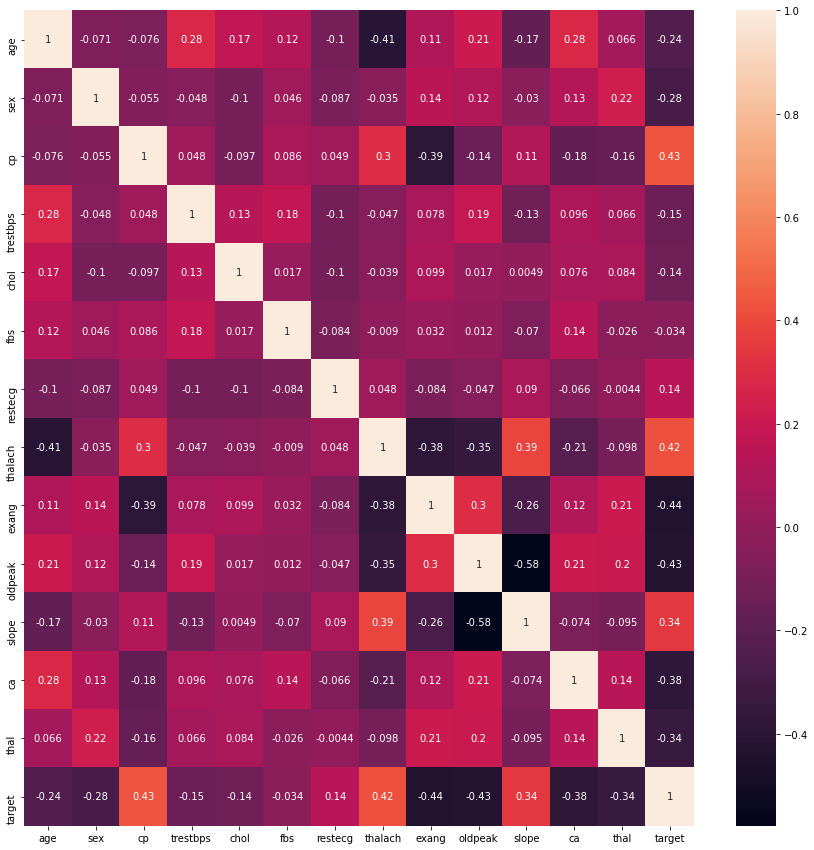

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(df_rev.corr(),annot=True)
plt.show()

skewness:  0.13162658464067437


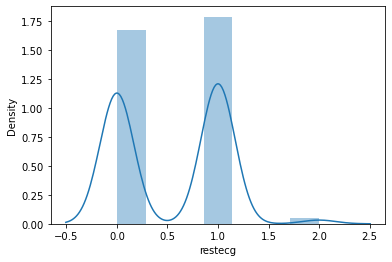

In [32]:
from scipy.stats import skew
print("skewness: ",skew(df_rev["restecg"]))
sns.distplot(df_rev["restecg"])
plt.show()

<AxesSubplot:xlabel='restecg', ylabel='Density'>

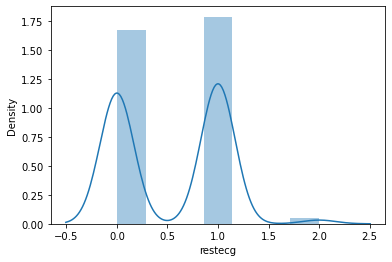

In [33]:
Y=df_rev["restecg"]
sns.distplot(Y,hist=True)

# Solution - np.sqrt

<AxesSubplot:xlabel='restecg', ylabel='Density'>

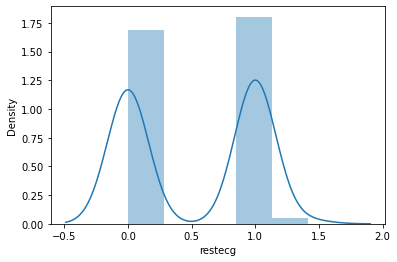

In [34]:

import numpy as np 
Y_sqrt = np.sqrt(Y) 
sns.distplot(Y_sqrt,hist=True)

In [35]:
print("skewness: ",skew(Y_sqrt))

skewness:  -0.06161636325834377


# Let's convert the DataFrame object to a NumPy array to achieve faster computation. 
# Also, let's segregate the data into separate variables so that the features and the labels are separated.

In [36]:
array = df_rev.values
X = array[:,0:13] # Observe Indexing
Y = array[:,13]


# The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features, in this case, it is Chi-Squared

In [37]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [38]:
# Feature extraction

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores

print(fit.scores_)

features = fit.transform(X)
df_rev.columns

[ 26.22333795   6.94232737  60.86256405  14.895291    43.95425758
   0.29117647   3.09435812 188.55985767  38.44378411  70.90447956
   9.47730179  61.30901505   5.55886223]


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [39]:
# Summarize selected features
print(features[0:5,:])

[[  3.  150.    2.3   0. ]
 [  2.  187.    3.5   0. ]
 [  1.  172.    1.4   0. ]
 [  1.  178.    0.8   0. ]
 [  0.  148.    0.4   0. ]]


# PRINCIPAL COMPONENT ANALYSIS:

In [40]:
df_rev

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [41]:
array = df_rev.values
X = array[:,0:13] # Observe Indexing
Y = array[:,13]


In [42]:
# Applying PCA 
from sklearn.decomposition import PCA 
pca = PCA(n_components = None) #to view the entire eigen vector,no subsetting 
X = pca.fit_transform(X) 
#X_test = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_ 
print(explained_variance)

[6.81172063e-01 1.90965317e-01 1.05768639e-01 2.05344799e-02
 4.70386446e-04 3.51531983e-04 2.87281125e-04 1.26132928e-04
 9.78542968e-05 7.41138376e-05 6.19841264e-05 5.09508201e-05
 3.92658650e-05]


In [43]:
# Applying PCA 
from sklearn.decomposition import PCA 
pca = PCA(n_components = .8) #to view the entire eigen vector,no subsetting 
X = pca.fit_transform(X) 
#X_test = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_ 
print(explained_variance)

[0.68117206 0.19096532]


# Create X and Y

In [44]:
X = df_rev.drop('target',axis=1)
Y=df_rev["target"]

# Scaling 

In [45]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s.fit(X)
X = s.transform(X)
X

array([[ 0.97173477,  0.65570702,  1.96907411, ..., -2.26408737,
        -0.71341221, -2.13664681],
       [-1.89357971,  0.65570702,  0.99928054, ..., -2.26408737,
        -0.71341221, -0.50662759],
       [-1.4527621 , -1.52507137,  0.02948697, ...,  0.97344819,
        -0.71341221, -0.50662759],
       ...,
       [ 1.52275679,  0.65570702, -0.94030661, ..., -0.64531959,
         1.25096002,  1.12339162],
       [ 0.31050835,  0.65570702, -0.94030661, ..., -0.64531959,
         0.2687739 ,  1.12339162],
       [ 0.31050835, -1.52507137,  0.02948697, ..., -0.64531959,
         0.2687739 , -0.50662759]])

In [46]:
Y = Y.astype(int)

# Split

In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

# Train

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

# Predict

In [49]:
Y_pred = lr.predict(X_test)

print(list(zip(Y_test,Y_pred)))

print(lr.intercept_)
print(lr.coef_)

[(0, 1), (1, 0), (1, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (1, 1), (1, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 0), (0, 0)]
[0.1015735]
[[-0.05575161 -0.69403692  0.79327551 -0.20102992 -0.29136296 -0.11096497
   0.29047268  0.43959113 -0.42405362 -0.5980853   0.30618873 -0.78484464
  -0.57353239]]


# Evaluation

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm = confusion_matrix(Y_test,Y_pred)

print('Confucion Matrix')
print(cfm)

print('Classification Report')
print(classification_report(Y_test,Y_pred))

print('Accuracy Score')
print(accuracy_score(Y_test,Y_pred))

Confucion Matrix
[[22  6]
 [ 4 28]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.82      0.88      0.85        32

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

Accuracy Score
0.8333333333333334


# Tuning

In [51]:
# default presiction 0.5
y_pred_prob = lr.predict_proba(X_test)
y_pred_prob

array([[0.20324351, 0.79675649],
       [0.52460816, 0.47539184],
       [0.89441229, 0.10558771],
       [0.00917715, 0.99082285],
       [0.00368485, 0.99631515],
       [0.66598359, 0.33401641],
       [0.17904813, 0.82095187],
       [0.94933575, 0.05066425],
       [0.06423909, 0.93576091],
       [0.8754337 , 0.1245663 ],
       [0.23465848, 0.76534152],
       [0.24472121, 0.75527879],
       [0.06835328, 0.93164672],
       [0.93005537, 0.06994463],
       [0.23672662, 0.76327338],
       [0.80247924, 0.19752076],
       [0.9908849 , 0.0091151 ],
       [0.35244829, 0.64755171],
       [0.31907302, 0.68092698],
       [0.94405132, 0.05594868],
       [0.854738  , 0.145262  ],
       [0.05617862, 0.94382138],
       [0.93707955, 0.06292045],
       [0.01103736, 0.98896264],
       [0.40517888, 0.59482112],
       [0.11883942, 0.88116058],
       [0.05968895, 0.94031105],
       [0.23275079, 0.76724921],
       [0.03101802, 0.96898198],
       [0.12090203, 0.87909797],
       [0.

In [52]:
# Manual adjustment
y_pred_class = []
for value in y_pred_prob[:,1]:
    if value > 0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
y_pred_class

[1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0]

In [53]:
cfm = confusion_matrix(Y_test,y_pred_class)

print('Confucion Matrix')
print(cfm)

print('Classification Report')
print(classification_report(Y_test,y_pred_class))

print('Accuracy Score')
print(accuracy_score(Y_test,y_pred_class))

Confucion Matrix
[[22  6]
 [ 4 28]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.82      0.88      0.85        32

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

Accuracy Score
0.8333333333333334


In [54]:
## Please mind indentnts

for a in np.arange(0.3,0.8,0.01): 
    ##np.arange(0,1.01,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine) 
    total_err=cfm[0,1]+cfm[1,0] 
    acc=accuracy_score(Y_test,predict_mine)
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
        cfm[1,0]," , type 1 error:", cfm[0,1],'Accuracy :',round(acc,2))

Errors at threshold  0.3 : 10  , type 2 error : 1  , type 1 error: 9 Accuracy : 0.83
Errors at threshold  0.31 : 10  , type 2 error : 1  , type 1 error: 9 Accuracy : 0.83
Errors at threshold  0.32 : 10  , type 2 error : 1  , type 1 error: 9 Accuracy : 0.83
Errors at threshold  0.33 : 10  , type 2 error : 1  , type 1 error: 9 Accuracy : 0.83
Errors at threshold  0.34 : 9  , type 2 error : 1  , type 1 error: 8 Accuracy : 0.85
Errors at threshold  0.35000000000000003 : 9  , type 2 error : 1  , type 1 error: 8 Accuracy : 0.85
Errors at threshold  0.36000000000000004 : 9  , type 2 error : 1  , type 1 error: 8 Accuracy : 0.85
Errors at threshold  0.37000000000000005 : 9  , type 2 error : 1  , type 1 error: 8 Accuracy : 0.85
Errors at threshold  0.38000000000000006 : 9  , type 2 error : 1  , type 1 error: 8 Accuracy : 0.85
Errors at threshold  0.39000000000000007 : 9  , type 2 error : 1  , type 1 error: 8 Accuracy : 0.85
Errors at threshold  0.4000000000000001 : 9  , type 2 error : 1  , type 

# select best threshold 0.64

In [55]:
# Manual adjustment
y_pred_class = []
for value in y_pred_prob[:,1]:
    if value > 0.64:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
y_pred_class

[1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [56]:
cfm = confusion_matrix(Y_test,y_pred_class)

print('Confucion Matrix')
print(cfm)

print('Classification Report')
print(classification_report(Y_test,y_pred_class))

print('Accuracy Score')
print(accuracy_score(Y_test,y_pred_class))

Confucion Matrix
[[24  4]
 [ 6 26]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        28
           1       0.87      0.81      0.84        32

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60

Accuracy Score
0.8333333333333334


# here we will be experimenting with 3 algorithms

# 1.KNeighborsClassifier

# 2.DecisionTreeClassifier

# 3.RandomForestClassifier

In [57]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=8, 
                               metric='euclidean')
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
#print(list(zip(Y_test,Y_pred))

In [58]:
int(np.sqrt(len(X_train)))

15

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[19  9]
 [ 4 28]]
0.7833333333333333
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.81        32

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60



In [60]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini", min_samples_leaf=5,
                                          max_depth=10,
                                          random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=10)

In [61]:
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1
 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1]
[(0, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (1, 0), (0, 1)]


In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[19  9]
 [ 5 27]]
0.7666666666666667
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.75      0.84      0.79        32

    accuracy                           0.77        60
   macro avg       0.77      0.76      0.76        60
weighted avg       0.77      0.77      0.76        60



In [63]:
print(list(zip(df_rev.columns,model_DecisionTree.feature_importances_)))

[('age', 0.013939519876403331), ('sex', 0.0), ('cp', 0.20322668011121642), ('trestbps', 0.0036186861374560503), ('chol', 0.022786216767372188), ('fbs', 0.0), ('restecg', 0.050711518836625474), ('thalach', 0.02280197349091673), ('exang', 0.0), ('oldpeak', 0.060338674687676765), ('slope', 0.13135644636734048), ('ca', 0.3444905121331783), ('thal', 0.14672977159181413)]


In [64]:
from sklearn import tree
with open("model_DecisionTree.txt", "w") as f:
    
    f = tree.export_graphviz(model_DecisionTree, feature_names=df_rev.columns[:-1],
                             out_file=f)
    
#generate the file and upload the code in webgraphviz.com to plot the decision tree

In [65]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=101, random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[22  6]
 [ 5 27]]
0.8166666666666667
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.84      0.83        32

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60



In [67]:
df_rev.shape

(296, 14)

# Finding the correlation among the attributes

<AxesSubplot:>

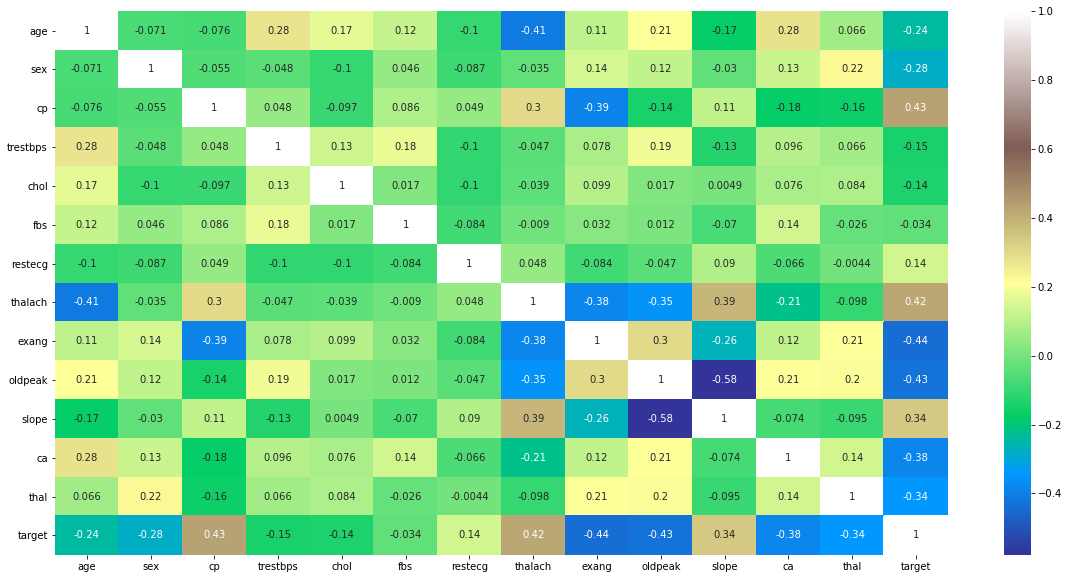

In [68]:
plt.figure(figsize=(20,10))
sns.heatmap(df_rev.corr(), annot=True, cmap='terrain')

# we observe positive correlation between target and cp, thalach,slope and also negative correlation between target and sex, exang,ca,thai,oldpeak

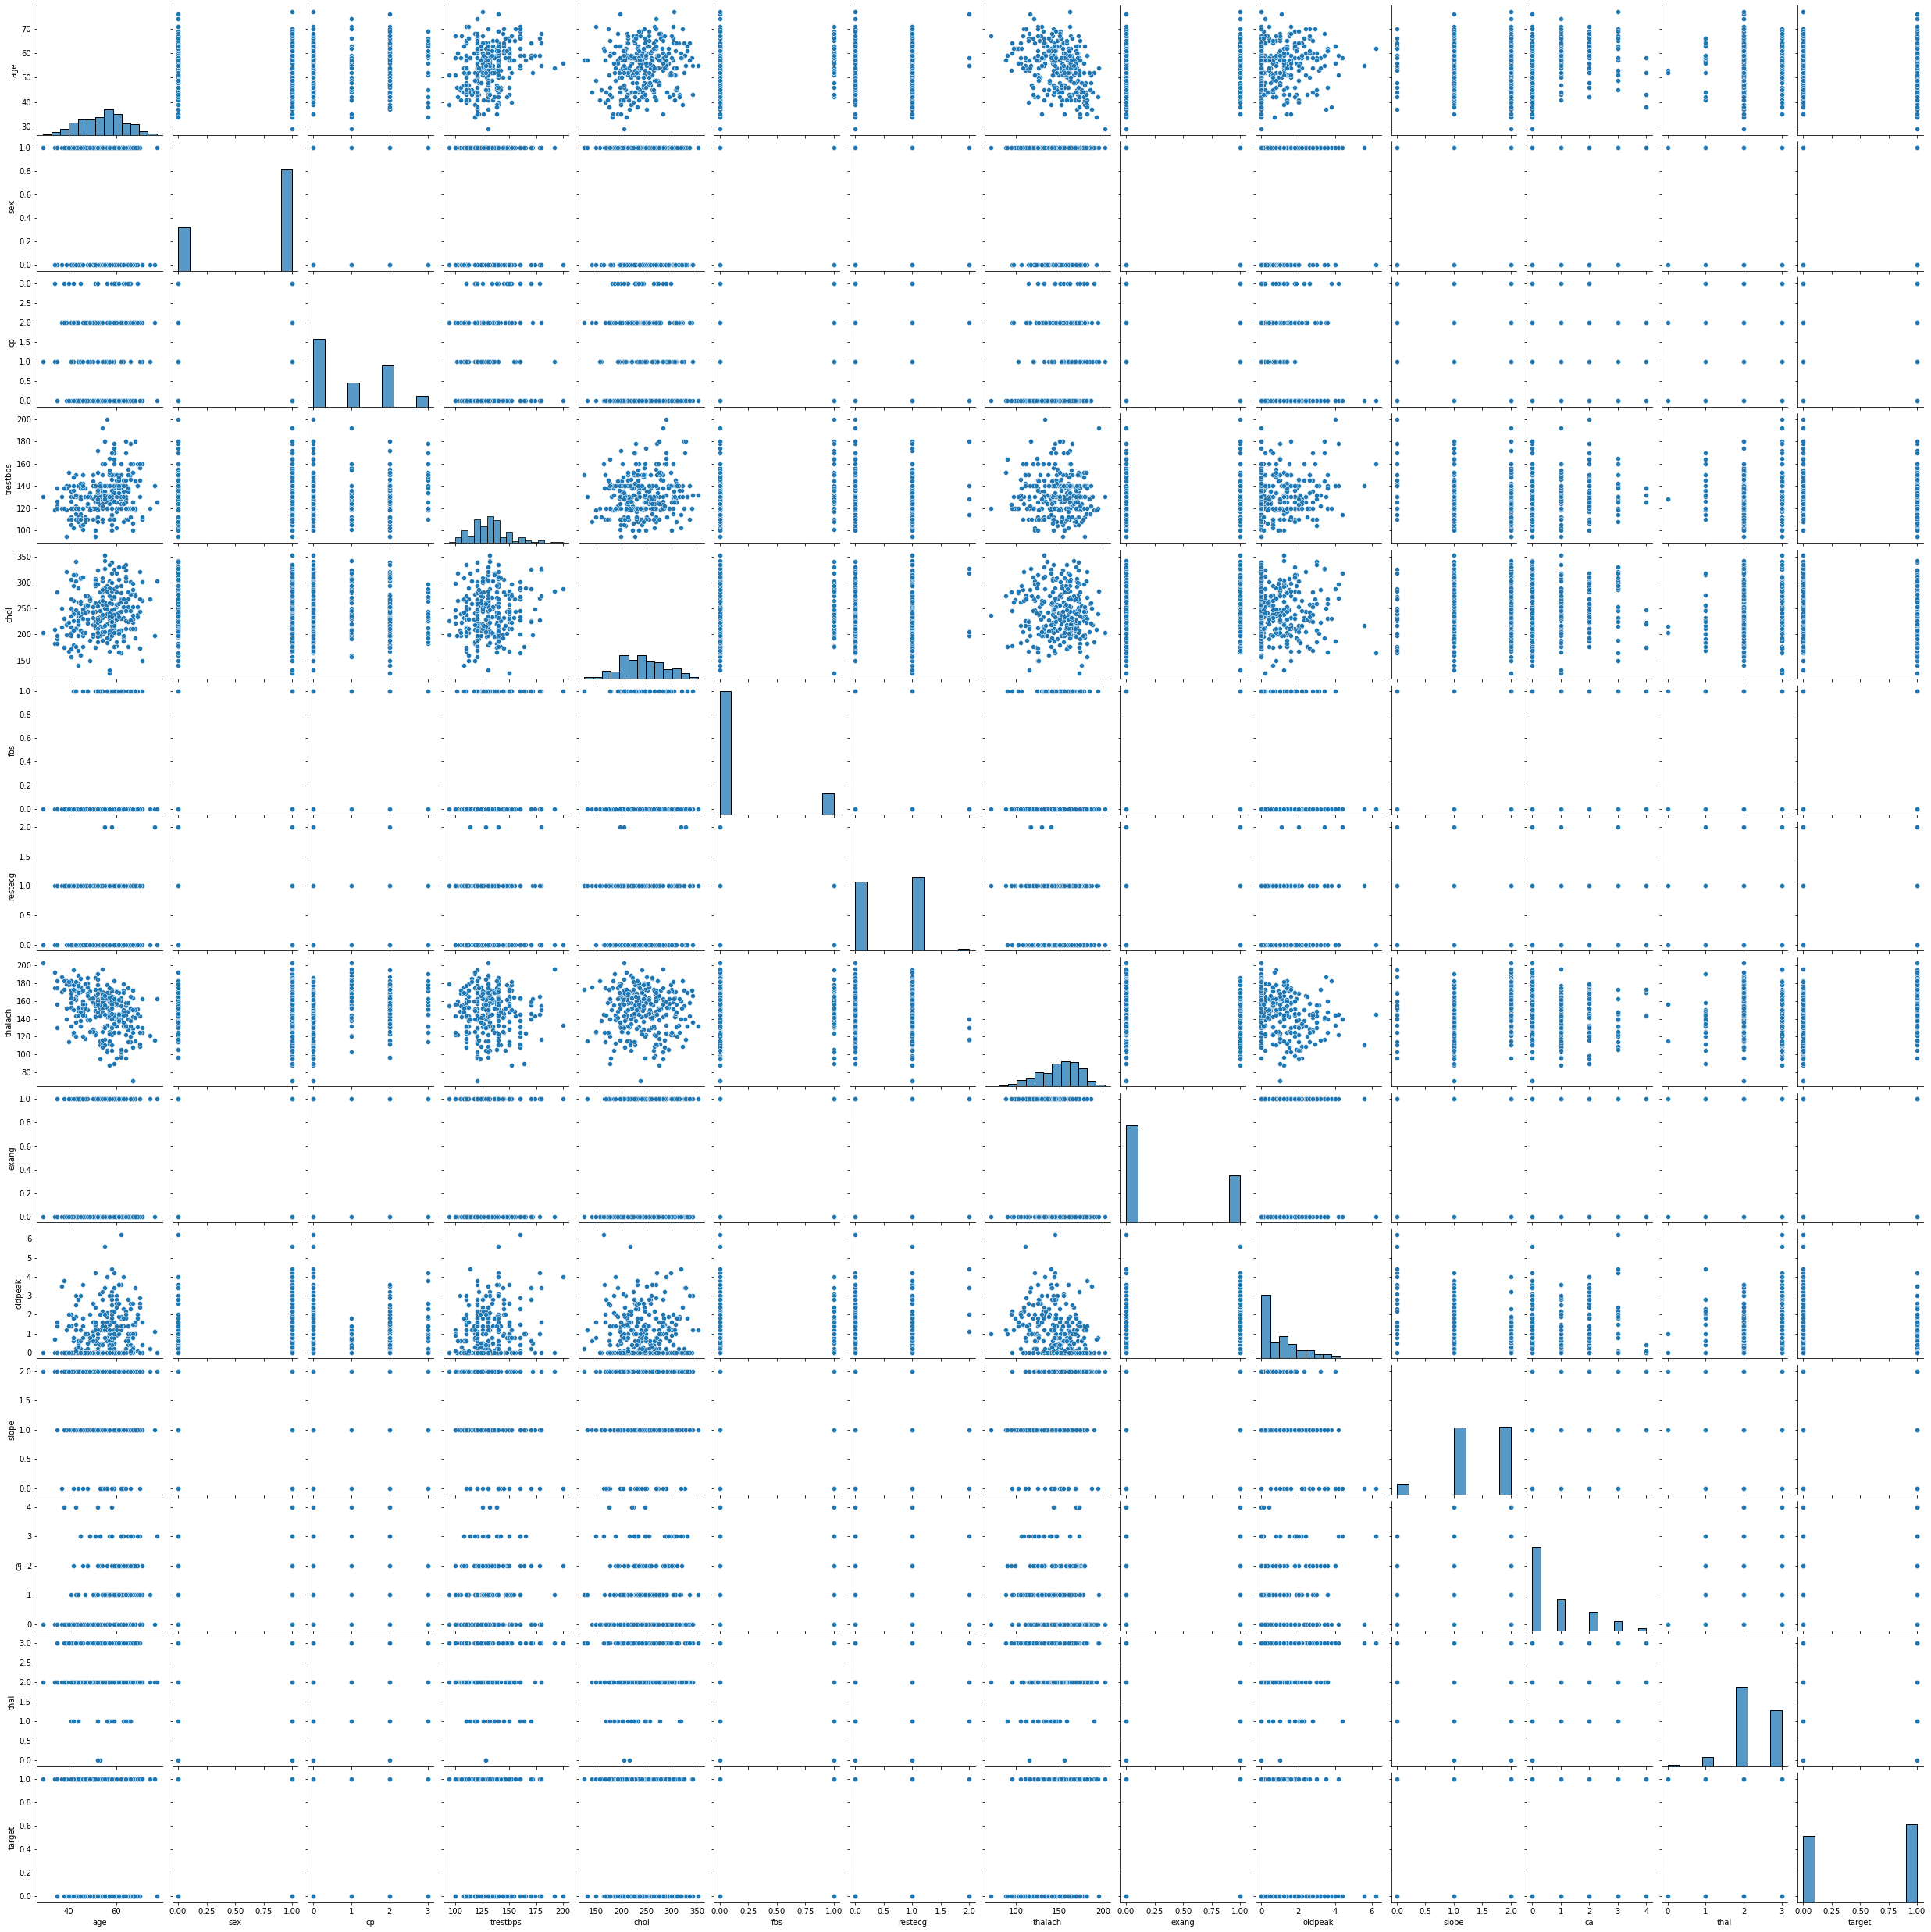

In [69]:

sns.pairplot(data=df_rev)

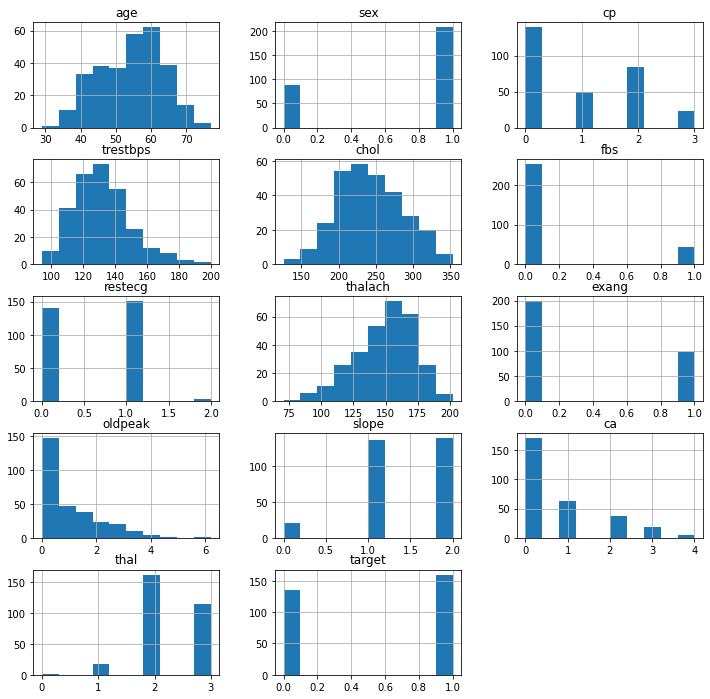

In [70]:
df_rev.hist(figsize=(12,12), layout=(5,3));

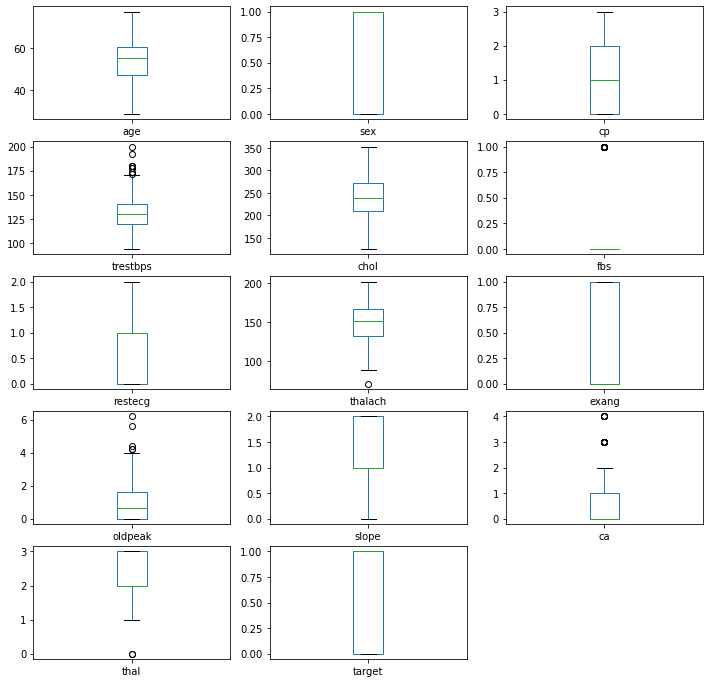

In [71]:
# box and whiskers plot
df_rev.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

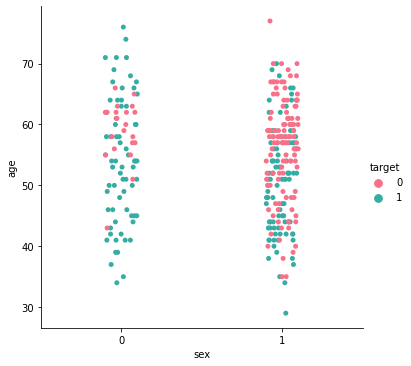

In [72]:
sns.catplot(data=df_rev, x='sex', y='age',  hue='target', palette='husl')

<AxesSubplot:xlabel='sex', ylabel='chol'>

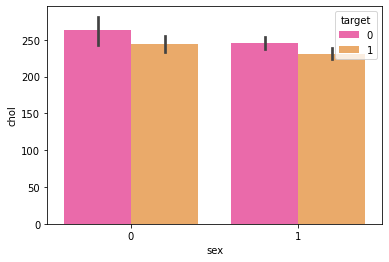

In [73]:
sns.barplot(data=df_rev, x='sex', y='chol', hue='target', palette='spring')

In [74]:
df_rev['sex'].value_counts()


1    207
0     89
Name: sex, dtype: int64

# 207 males and 96 females


In [75]:
df_rev['target'].value_counts()


1    160
0    136
Name: target, dtype: int64

# 160 cases of heart diseases  and  138 cases of no heart diseases

In [76]:
df_rev['thal'].value_counts()

2    162
3    114
1     18
0      2
Name: thal, dtype: int64

# results of thallium stress test measuring blood flow to the heart

with possible values normal, fixed_defect, reversible_defect

<AxesSubplot:xlabel='sex', ylabel='count'>

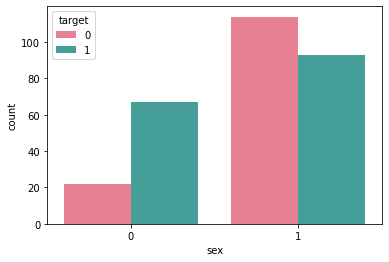

In [77]:
sns.countplot(x='sex', data=df_rev, palette='husl', hue='target')

# Here 1 means male and 0 denotes female. we observe female having heart disease are comparatively less when compared to males Males have low heart diseases as compared to females in the given dataset.

<AxesSubplot:xlabel='target', ylabel='count'>

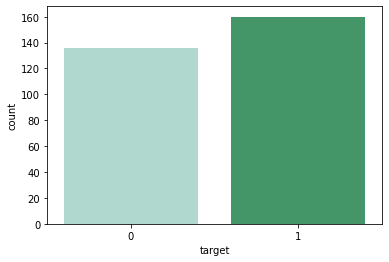

In [78]:
sns.countplot(x='target',palette='BuGn', data=df_rev)

# we observe the count for not having heart disease and having heart disease are almost balanced not having frequency count is 140 and those having heart disease the count is 160.

<AxesSubplot:xlabel='ca', ylabel='count'>

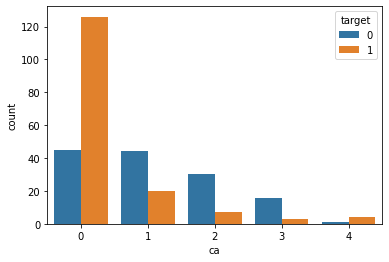

In [79]:
sns.countplot(x='ca',hue='target',data=df_rev)

# ca : number of major vessels (0-3) colored by flourosopy

In [80]:
df_rev['ca'].value_counts()

0    171
1     64
2     37
3     19
4      5
Name: ca, dtype: int64

# ca number of major vessels (0-3) colored by flourosopy ca has a negative corelation with the target i.e when ca will increase we witness a drop in heart diseases and vice versa.

<AxesSubplot:xlabel='thal', ylabel='count'>

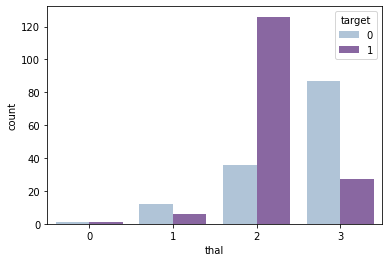

In [81]:
sns.countplot(x='thal',data=df_rev, hue='target', palette='BuPu' )

# thal3 = normal; 6 = fixed defect; 7 = reversable defect

In [82]:

df_rev['cp'].value_counts()  # chest pain type

0    139
2     84
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

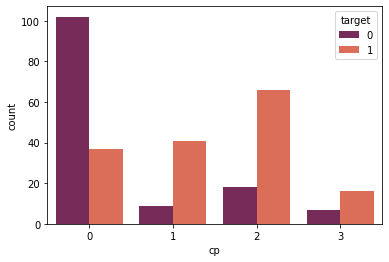

In [83]:
sns.countplot(x='cp' ,hue='target', data=df_rev, palette='rocket')

# shows chest pain with respect to heart disease/ target



<AxesSubplot:xlabel='cp', ylabel='count'>

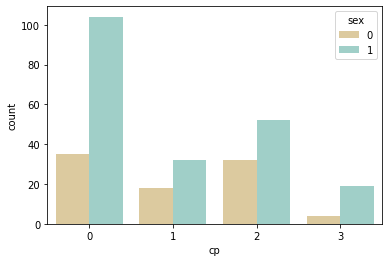

In [84]:
sns.countplot(x='cp', hue='sex',data=df_rev, palette='BrBG')

# this shows chest pain count experienced by male and female

<AxesSubplot:xlabel='sex', ylabel='chol'>

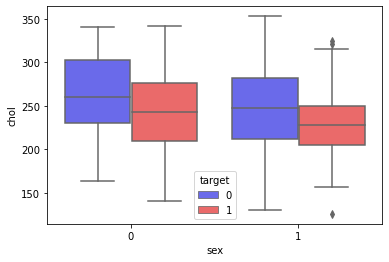

In [85]:
sns.boxplot(x='sex', y='chol', hue='target', palette='seismic', data=df_rev)

# we observe the outliers with the help of boxplot. outliers are values that are very small or large in the given data set

<AxesSubplot:xlabel='sex', ylabel='cp'>

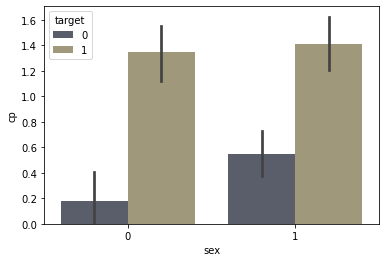

In [86]:
sns.barplot(x='sex', y='cp', hue='target',data=df_rev, palette='cividis')

<AxesSubplot:xlabel='sex', ylabel='thal'>

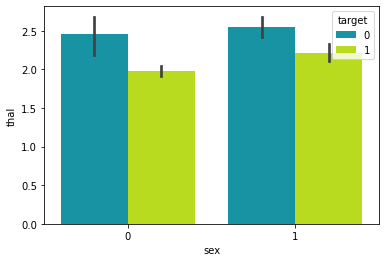

In [87]:

sns.barplot(x='sex', y='thal', data=df_rev, hue='target', palette='nipy_spectral')

<AxesSubplot:xlabel='target', ylabel='ca'>

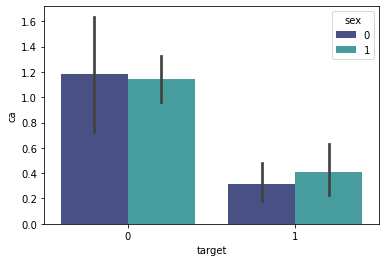

In [88]:

sns.barplot(x='target', y='ca', hue='sex', data=df_rev, palette='mako')

<AxesSubplot:xlabel='sex', ylabel='oldpeak'>

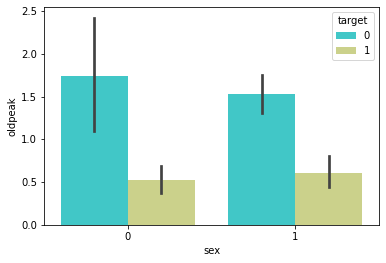

In [89]:
sns.barplot(x='sex', y='oldpeak', hue='target', palette='rainbow', data=df_rev)

# ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

# fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) and chest pain relation

In [90]:
df_rev['fbs'].value_counts()

0    252
1     44
Name: fbs, dtype: int64

<AxesSubplot:xlabel='fbs', ylabel='chol'>

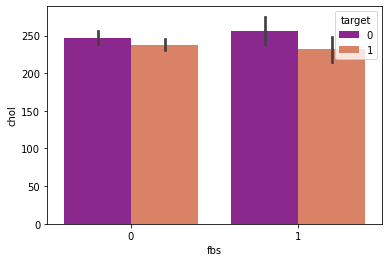

In [91]:

sns.barplot(x='fbs', y='chol', hue='target', data=df_rev,palette='plasma' )

<AxesSubplot:xlabel='sex', ylabel='target'>

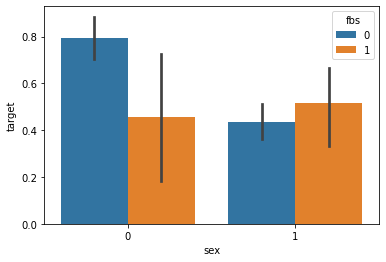

In [92]:
sns.barplot(x='sex',y='target', hue='fbs',data=df_rev)

# Cross Tables


In [93]:

gen = pd.crosstab(df_rev['sex'], df_rev['target'])
print(gen)

target    0   1
sex            
0        22  67
1       114  93


<AxesSubplot:xlabel='sex'>

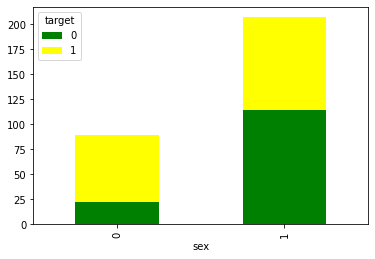

In [94]:
gen.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)

In [95]:

temp=pd.crosstab(index=df_rev['sex'],
            columns=[df_rev['thal']], 
            margins=True)
temp

thal,0,1,2,3,All
sex,,,,,
0,1,1,75,12,89
1,1,17,87,102,207
All,2,18,162,114,296


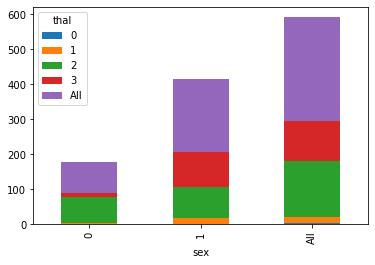

In [96]:
temp.plot(kind="bar",stacked=True)
plt.show()

In [97]:

temp=pd.crosstab(index=df_rev['target'],
            columns=[df_rev['thal']], 
            margins=True)
temp

thal,0,1,2,3,All
target,,,,,
0,1,12,36,87,136
1,1,6,126,27,160
All,2,18,162,114,296


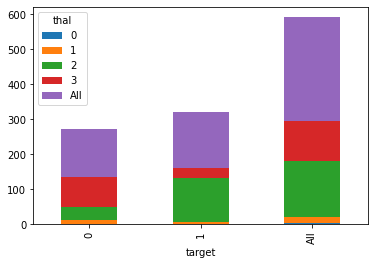

In [98]:

temp.plot(kind='bar', stacked=True)
plt.show()

In [99]:
chest_pain = pd.crosstab(df_rev['cp'], df_rev['target'])
chest_pain

target,0,1
cp,,
0,102,37
1,9,41
2,18,66
3,7,16


<AxesSubplot:xlabel='cp'>

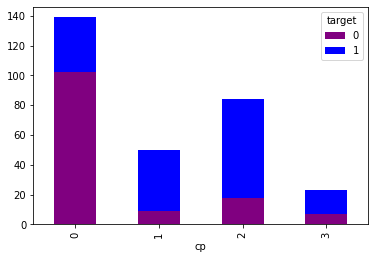

In [100]:
chest_pain.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

In [101]:
df_rev["target"].value_counts()

1    160
0    136
Name: target, dtype: int64

# CONCLUSION:THIS PROJECT WAS SUCCESSFULLY EXECUTED AND OUT OF 303 THERE ARE 160 HEART DISEASE PERSONS IS PRESENT IN MY RECORD

# Best accuracy is given by Logistic Regression : 83

# The accuracy given by kneighbor classifier:78

# The accuracy given by DecisionTree classifier:76

# The accuracy given by RandomForest classifier:81